<a id='top_of_page'></a>
# Constructing an Optical Path Difference (OPD) map for JWST observations some time after maximum pitch angle change due to slew


* *os* for joining paths
* *astropy.io* fits for accessing FITS files
* *astropy.units* for using quantities
* *numpy* for performing basic math functions and array manipulation
* *matplotlib* for plotting data
* *matplotlib inline* for creating inline plots
* *webbpsf* for using the thermal model and creating simulated PSFs

In [1]:
# Standard Library
import os

# Third Party
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import webbpsf

plt.rcParams.update({'figure.dpi' : 100,
                     'font.size' : 12,
                     'image.origin' : 'lower',
                     'image.interpolation' : 'nearest',
                     'image.cmap' : 'RdBu_r'})

%matplotlib inline

This notebook will walk through creating a JWST OPD for a given time after the observatory has undergone a *maximum* change in pitch angle relative to the sun. 


<img src="jwst_slew.png" width=650px>

This work is based off of five thermal Optical Path Difference (OPD) models we have for 10,000 seconds, 1 day, 7 days, 14 days, and 30 days after the telescope has finished a slew that results in the maximum sun pitch angle change of 50 degrees. We fit these data with a second order thermal response function and saved the fitting parameters to a FITS table, which is what is used to create these final OPDs, at any given time after slew. Once we have the OPD for any time after slew, we can combine this with the predicted or requirment OPDs expected for each instrument and simulate the predicted PSF at that time. This helps us predict the stability of the observatory based solely on the thermal impact of slewing the telescope relative to the sun.

## Table of Contents 

1. [Construct the surfaces at different times after maximum angle](#section1)
 * [Time since maximum slew = 15 mins](#section1.1)
 
 * [Time since maximum slew = 1 hour](#section1.2)
 
2. [Construct the surfaces at different times after a slew of some angle](#section2)
 * [Time since maximum slew = 15 mins](#section2.1)
 
 * [Time since maximum slew = 1 hour](#section2.2)

3. [Construct the surfaces at different times after some slew, scaled](#section3)
 * [Time since maximum slew = 15 mins](#section3.1)
  
 * [Time since maximum slew = 1 hour](#section3.2)
 
4. [Some examples for how to create and compare PSFs with delta OPDs](#section4)
 * [Create a NIRCam Imaging PSF](#section4.1)
 * [Create a NIRCam Coronagraphic PSF](#section4.2)
 * [Compare a nominal PSF with a PSF after maximum slew - NIRISS AMI](#section4.3)

<a id='section1'></a>
## Construct the surfaces at different times after *maximum* angle 

NOTE: Make sure to keep an eye on units and the stretch for each OPD. The stretch is kept consistent across all `delta_time`s.

In [2]:
# Plotting constants
vmin = -1
vmax = 1
m_to_nm = 1e9

<a id='section1.1'></a>
### Time since maximum slew = 15 mins 

Create a OPD for 15 minutes after slew after the maximum slew angle (start angle = -5 degrees, and end angle = 45 degrees).

In [3]:
delta_time = 15 * u.min # Delta time should be an astropy units quantity
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time)

print("This OPD is in units of: {}".format(otelm.opd_header['BUNIT']))

This OPD is in units of: meter


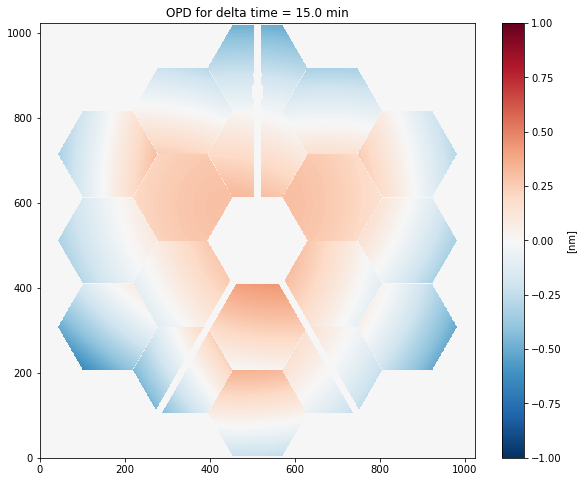

In [4]:
plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax) # Convert to nm
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section1.2'></a>
### Time since maximum slew = 1 hour

Create a OPD for 1 hour after slew after the maximum slew angle (start angle = -5 degrees, and end angle = 45 degrees).

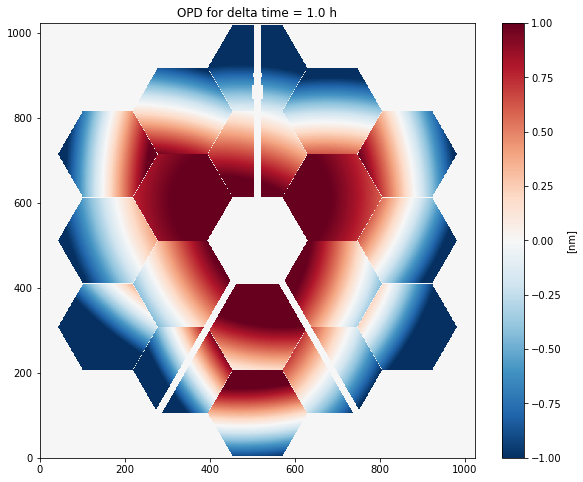

In [5]:
delta_time = 1 * u.hour
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time)

plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax)
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section2'></a>
## Construct the surfaces at different times after a slew of some angle

<a id='section2.1'></a>
### Time since maximum slew = 15 mins

Now create a OPD for 15 minutes after a slew of an arbitray start and end angle (not a maximum slew).

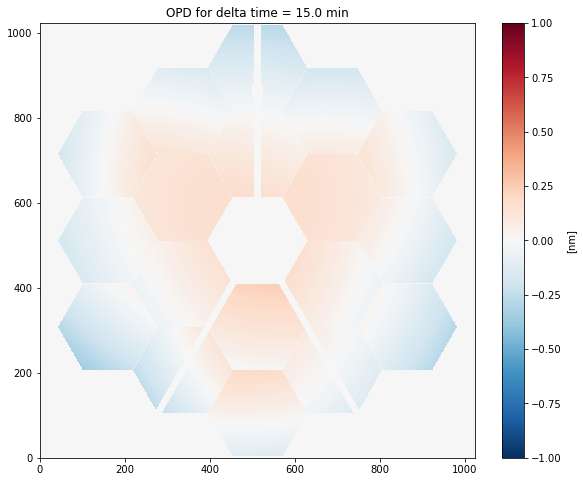

In [6]:
delta_time = 15 * u.min # Delta time should be an astropy units quantity
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time, start_angle=10., end_angle=35.)

plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax)
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section2.2'></a>
### Time since maximum slew = 1 hour

Now create a OPD for 1 hour after a slew of an arbitray start and end angle (not a maximum slew).

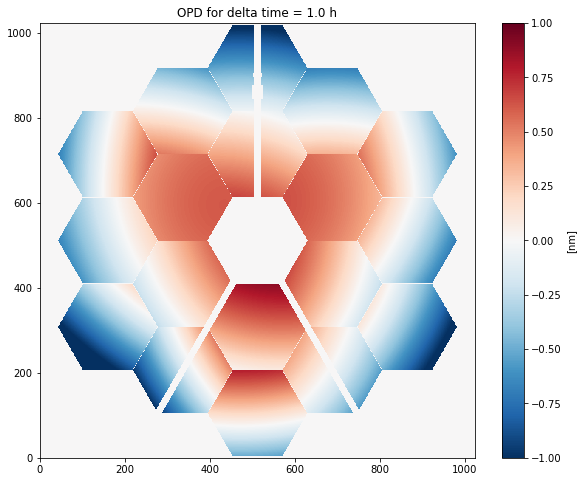

In [7]:
delta_time = 1 * u.hour # Delta time should be an astropy units quantity
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time, start_angle=10., end_angle=35.)

plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax)
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section3'></a>
## Construct the surfaces at different times after some slew, scaled

<a id='section3.1'></a>
### Time since maximum slew = 15 mins

Now create a OPD for 15 minutes after slew, however this time you will just scale the maximum by some factor.

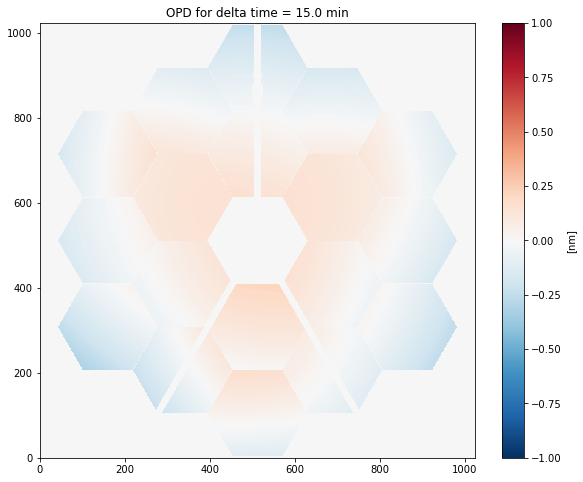

In [8]:
delta_time = 15 * u.min # Delta time should be an astropy units quantity
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time, scaling=.5)

plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax)
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section3.2'></a>
### Time since maximum slew = 1 hour

Now create a OPD for 15 minutes after slew, however this time you will just scale the maximum by some factor.

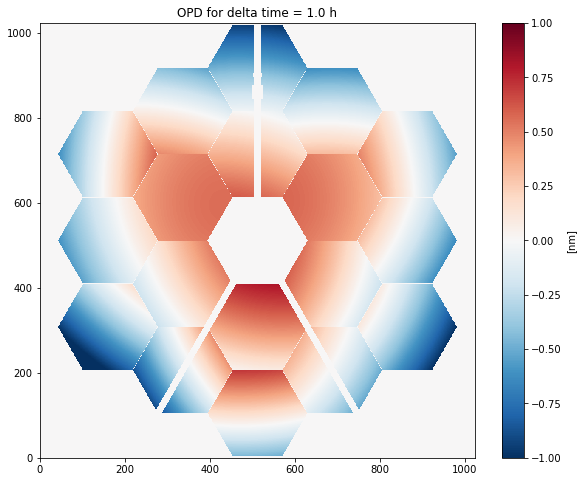

In [9]:
delta_time = 1 * u.hour # Delta time should be an astropy units quantity
otelm = webbpsf.opds.OTE_Linear_Model_WSS()
otelm.thermal_slew(delta_time=delta_time, scaling=.5)

plt.figure(figsize=(10,8))
plt.imshow(otelm.opd * m_to_nm, vmin=vmin, vmax=vmax)
plt.title("OPD for delta time = {}".format(delta_time))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section4'></a>
## Some examples for how to create and compare PSFs with delta OPDs

##### Make sure to change the below paths are correct 

In [10]:
# Path to your `webbpsf-data` directory
path_to_webbpsf_data = webbpsf.utils.get_webbpsf_data_path()

# Path to where you want to save out your files
path_to_out = "" 

##### Convenience functions

In [11]:
jwst_pupil = fits.getdata(os.path.join(path_to_webbpsf_data, "jwst_pupil_RevW_npix1024.fits.gz"))

def calculate_opd_rms(opd, mask=jwst_pupil, m_to_nm=True, um_to_nm=False):
    """
    Find the root mean square for an OPD within a mask

    """
    rms = np.sqrt(np.mean(np.square(opd[mask != 0])))
    
    # Convert from units of m to nm
    if m_to_nm:
        rms /= 10**(-9)
    elif um_to_nm:
        rms /= 10**(-3) 
    return rms


In [12]:
def check_units(opd, opdunits, verbose=False):
    """
    Make sure that the coefficients are in the correct units - meters.
    (Adapted from poppy.poppy_core.FITSOpticalElement)
    """
    opd_copy = np.copy(opd)
    # normalize and drop any trailing 's'
    opdunits = opdunits.lower()
    if opdunits.endswith('s'):
        opdunits = opdunits[:-1]

    # rescale OPD to meters if necessary
    if opdunits in ('meter', 'm'):
        if verbose:
            print("OPD in units of METER")
        pass
    elif opdunits in ('micron', 'um', 'micrometer'):
        if verbose:
            print("OPD in units of MICRON")
        if len(opd_copy.shape) > 2:
            for o in opd_copy:
                o *= 1e-6
        else:
            opd_copy *= 1e-6 
    elif opdunits in ('nanometer', 'nm'):
        if verbose:
            print("OPD in units of NANOMETER")
        if len(opd_copy.shape) > 2:
            for o in opd_copy:
                o *= 1e-9
        else:
            opd_copy *= 1e-9
    else:
        raise ValueError(
            "Got opdunits (or BUNIT header keyword) {}. Valid options "
            "are meter, micron, nanometer, or radian.".format(repr(opdunits)))
    return opd_copy

In [13]:
def combine_opds(base_opd, delta_opd_otelm, outname=None, verbose=True):
    """
    Combine two OPDs, where the second is a delta_opd due to thermal variation after maximum slew.
    The base_opd will be passed in as a string, the delta_opd can be passed as a string or array-like
    Function adapted from Marshall Perrin
    
    Parameters
    ----------
    base_opd: str
        Original OPD (usually of the form: 'OPD_Rev{}_ote_for_{}_requirements.fits.gz')
    delta_opd_otelm: WebbPSF OPD object
        WebbPSF OPD object for the OPD to be added to the original OPD, that has the attribute for 
        the OPD itself, but also includes information such as the units of that OPD.
    outname: string
        Name of output combined OPD
    verbose: bool
        Whether or not to print out what is happening
    """
    # --------------------------------- Open OPDs ---------------------------------
    # Open base_opd
    opdf = fits.open(base_opd)
    opd = opdf[0].data
    opd_header = opdf[0].header
    try:
        opd_units = opd_header['BUNIT']
    except KeyError:
        raise Exception("No opdunit keyword supplied, and BUNIT keyword not found in header. "
                        "Cannot determine OPD units.")
        
    opd = check_units(opd, opd_units) # Return units of METER
    
    # Get delta opd and info about the slew
    delta = delta_opd_otelm.opd
    delta_units = delta_opd_otelm.opd_header['BUNIT']
    delta_time = delta_opd_otelm.opd_header['DELTA_T']
    delta_time_unit = u.day #Know that the units in the header are in days (can check opd_header comment)
    start_angle = delta_opd_otelm.opd_header['STARTANG']
    end_angle = delta_opd_otelm.opd_header['ENDANG']
    try:
        amplitude = delta_opd_otelm.opd_header['SCALING']
    except KeyError:
        amplitude = np.sin(np.radians(end_angle) - np.radians(start_angle)) / np.sin(np.radians(45.) - np.radians(-5.))
   
    delta = check_units(delta, delta_units) # Return units of METER
    
    if verbose:
        print("Found a {} shape OPD".format(opd.shape))
        print("Adding delta OPD with scaling {}".format(amplitude))
    
    
    # --------------------------------- Add the OPDs ---------------------------------
    # If the base_opd is a cube, loop over the different OPDs in base_opd, 
    #  add the OPDs together, scaling as necessary, otherwise just add them
    opd_out = np.zeros_like(opd)
    if len(opd.shape) > 2:
        for i, o in enumerate(opd):
            opd_out[i] = o + delta
            if verbose:
                print("  Adding to cube slice {}".format(i))
    else:
        opd_out = opd + delta
        if verbose:
            print("  Adding to OPD.")

            
    # --------------------------------- Update header ---------------------------------
    if len(opd_out.shape) > 2:
        for i, o in enumerate(opd_out): 
            opd_header["WFE_RMS{}".format(i)] = ("{:.1f}".format(calculate_opd_rms(o)), 
                                                 "RMS wavefront error in slice {} [nm]".format(i))

    else:
        opd_header["WFE_RMS"] = ("{:.1f}".format(calculate_opd_rms(opd_out)), 
                                 "RMS wavefront error [nm]")
     
    opd_header['BUNIT'] = 'meter'
    opd_header.add_history("Modified OPD by adding oscillation")
    opd_header.add_history(" delta from {} {} after max slew".format(delta_time, delta_time_unit))
    opd_header.add_history(" scaled by {}".format(amplitude))
    
    opd_header['ORIGINAL'] = (os.path.basename(base_opd), 
                                  "Original file for this OPD")


    # --------------------------------- Quick check/test ---------------------------------
    if np.array_equal(opd[0], opd_out[0]):
        print("WARNGING: Out OPD not changed. Returning nothing")
    
    
    # --------------------------------- Write out new file ---------------------------------
    if outname is None:
        outbase = os.path.basename(base_opd).split('.')[0]
        outname = "{}_VARIANT_thermal_{:.2f}{}_{:.1f}a.fits".format(outbase, delta_time, 
                                                                    delta_time_unit, amplitude)
    # Make new hdulist
    hdul = fits.PrimaryHDU(data=opd_out)
    hdul.header = opd_header

    hdul.writeto(outname, overwrite=True)
    if verbose:
        print("Output to {}".format(outname))

    return outname

#### Create an OPD for 1 day after maximum slew

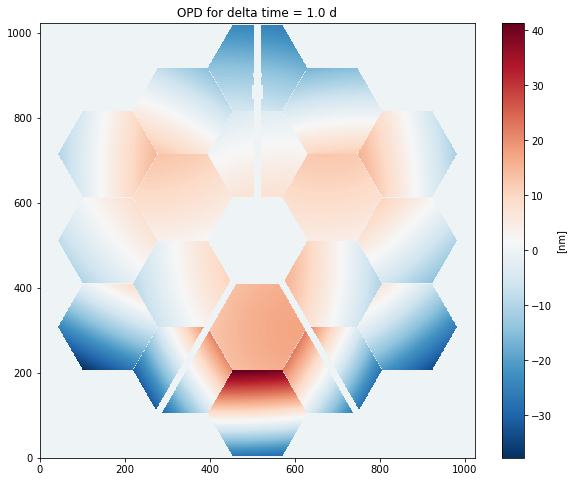

In [14]:
delta_time_1d = 1 * u.day # Delta time should be an astropy units quantity
otelm_1d = webbpsf.opds.OTE_Linear_Model_WSS()
otelm_1d.thermal_slew(delta_time=delta_time_1d)

plt.figure(figsize=(10,8))
plt.imshow(otelm_1d.opd * m_to_nm)
plt.title("OPD for delta time = {}".format(delta_time_1d))
cbar = plt.colorbar()
cbar.set_label('[nm]')
plt.show()

<a id='section4.1'></a>
### Create a NIRCam Imaging PSF with slew

In [15]:
req_opd_nrc = os.path.join(path_to_webbpsf_data,"NIRCam", "OPD", "OPD_RevW_ote_for_NIRCam_requirements.fits.gz") 

In [16]:
nc1 = webbpsf.NIRCam()

In [17]:
# Get OPDs to combine
# Use the requirements OPD as your base
# Use the 1d otelm object as your delta
nc1.pupilopd = combine_opds(req_opd_nrc, otelm_1d, verbose=True)

Found a (10, 1024, 1024) shape OPD
Adding delta OPD with scaling 1.0
  Adding to cube slice 0
  Adding to cube slice 1
  Adding to cube slice 2
  Adding to cube slice 3
  Adding to cube slice 4
  Adding to cube slice 5
  Adding to cube slice 6
  Adding to cube slice 7
  Adding to cube slice 8
  Adding to cube slice 9
Output to OPD_RevW_ote_for_NIRCam_requirements_VARIANT_thermal_1.00d_1.0a.fits


In [18]:
psf_nc1 = nc1.calc_psf(oversample=4)     # returns an astropy.io.fits.HDUlist containing PSF and header

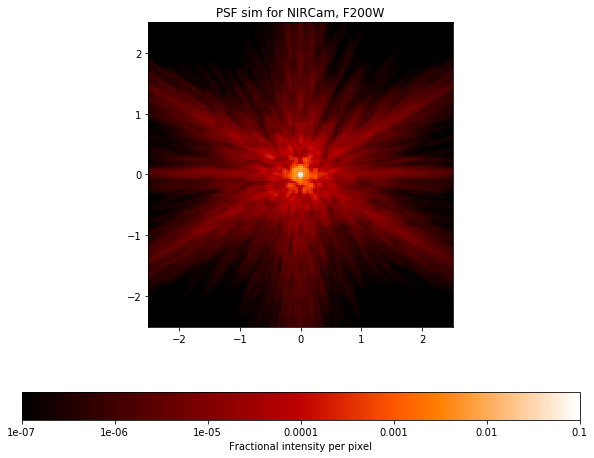

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
webbpsf.display_psf(psf_nc1, ext=1, ax=ax, colorbar=True, colorbar_orientation='horizontal')
plt.show()

<a id='section4.2'></a>
### Create a NIRCam Coronagraphic PSF with slew

In [20]:
nc2 = webbpsf.NIRCam()
# Apply coronagraphic mask with corresponding filter
nc2.image_mask = 'MASK335R'
nc2.filter = 'F335M'

In [21]:
# Get OPDs to combine
# Use the requirements OPD as your base
# Use the 1d otelm object as your delta
nc2.pupilopd = combine_opds(req_opd_nrc, otelm_1d, verbose=False)
print(nc2.pupilopd)

OPD_RevW_ote_for_NIRCam_requirements_VARIANT_thermal_1.00d_1.0a.fits


In [22]:
psf_nc2 = nc2.calc_psf(oversample=4)     # returns an astropy.io.fits.HDUlist containing PSF and header

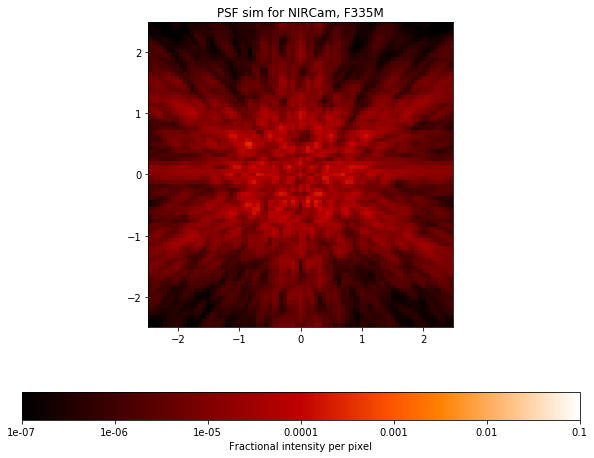

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
webbpsf.display_psf(psf_nc2, ext=1, ax=ax, colorbar=True, colorbar_orientation='horizontal')
plt.show()

<a id='section4.3'></a>
###  Compare a nominal PSF with a PSF after maximum slew - NIRISS AMI

In [24]:
req_opd_nrs = os.path.join(path_to_webbpsf_data,"NIRISS", "OPD", "OPD_RevW_ote_for_NIRISS_requirements.fits.gz") 

#### Create a NIRISS Aperture Masking Interferometry (AMI) PSF without slew

In [25]:
niriss1 = webbpsf.NIRISS()
# Apply coronagraphic mask with corresponding filter
niriss1.filter = "F380M"
niriss1.pupil_mask = "MASK_NRM"

niriss1.pupilopd = req_opd_nrs
print(niriss1.pupilopd)

/Users/kbrooks/git_repos/webbpsf-data/NIRISS/OPD/OPD_RevW_ote_for_NIRISS_requirements.fits.gz


In [26]:
psf_nrs1 = niriss1.calc_psf(oversample=1)     # returns an astropy.io.fits.HDUlist containing PSF and header

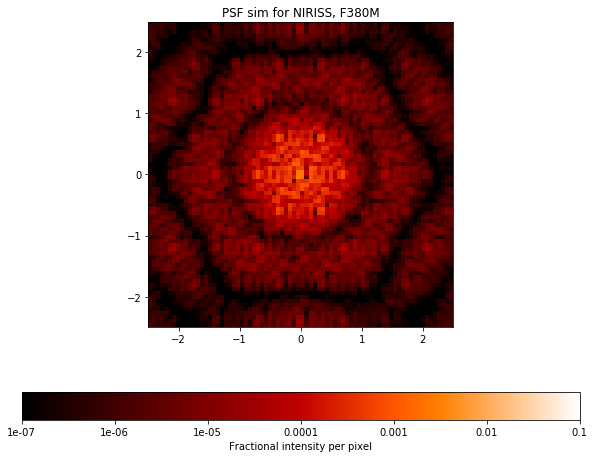

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
webbpsf.display_psf(psf_nrs1, ext=1, ax=ax, colorbar=True, colorbar_orientation='horizontal')
plt.show()

#### Create a NIRISS Aperture Masking Interferometry (AMI) PSF with slew

In [28]:
niriss2 = webbpsf.NIRISS()
# Apply coronagraphic mask with corresponding filter
niriss2.filter = "F380M"
niriss2.pupil_mask = "MASK_NRM"

In [29]:
# Get OPDs to combine
# Use the requirements OPD as your base
# Use the 1d otelm object as your delta
niriss2.pupilopd = combine_opds(req_opd_nrs, otelm_1d, verbose=False)
print(niriss2.pupilopd)

OPD_RevW_ote_for_NIRISS_requirements_VARIANT_thermal_1.00d_1.0a.fits


In [30]:
psf_nrs2 = niriss2.calc_psf(oversample=1)     # returns an astropy.io.fits.HDUlist containing PSF and header

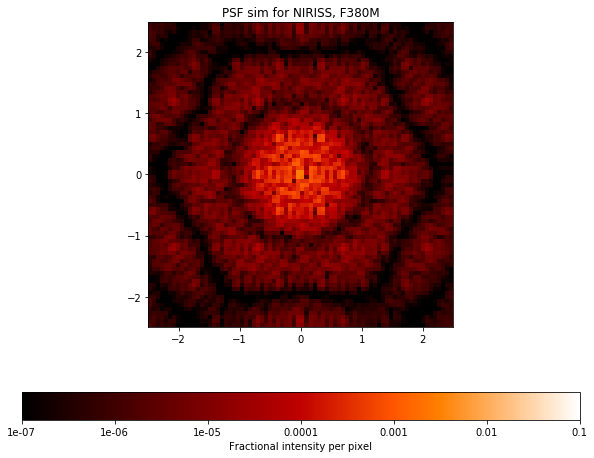

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
webbpsf.display_psf(psf_nrs2, ext=1, ax=ax, colorbar=True, colorbar_orientation='horizontal')
plt.show()

#### Compare the two PSFs by displaying the difference

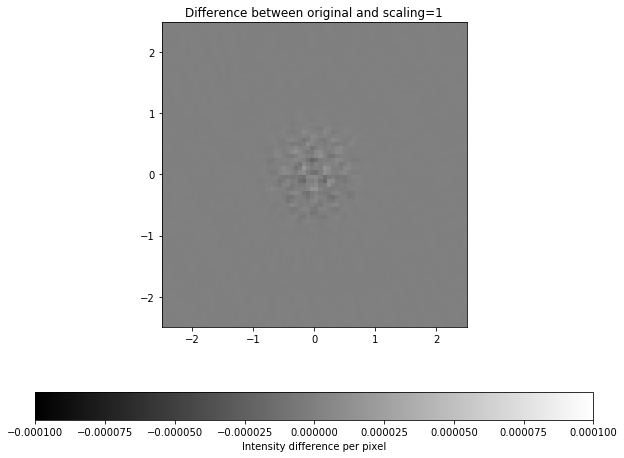

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
webbpsf.display_psf_difference(psf_nrs1, psf_nrs2, ext1=1, ext2=1, ax=ax, colorbar=True, 
                               colorbar_orientation='horizontal', title='Difference between original and scaling=1')
plt.show()

## About this notebook 

#### Author(s): 
Keira Brooks

#### Updated On: 
May 20, 2019

[Top of Page](#top_of_page)